# MSA K-Means Clustering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv(r"C:\Users\samvi\Documents\Coding Projects\Embedded Work\Data\MSA Master Sheet.csv")

In [3]:
df.head()

,MSA Code,MSA Name,FIPS State Code,HPI Volatility,Most Recent HPI,Population,Unemployment Rate
0,10180,"Abilene, TX",48,6.376873,336.73,184278,3.5
1,10380,"Aguadilla, PR",72,6.500000,250.00,250969,7.6
2,10420,"Akron, OH",39,4.253307,257.62,702209,4.4
3,10500,"Albany, GA",13,4.271005,241.76,145451,4.2
4,10540,"Albany, OR",41,5.997320,420.17,132474,4.6


In [4]:
selected_columns = ["HPI Volatility", "Most Recent HPI", "Population", "Unemployment Rate"]

<Axes: xlabel='Population', ylabel='HPI Volatility'>

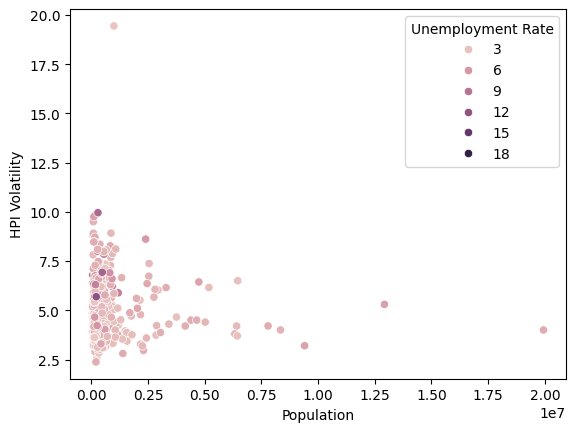

In [5]:
sns.scatterplot(data=df, x="Population", y="HPI Volatility", hue = "Unemployment Rate")

In [6]:
# Normalize our data

scaler = MinMaxScaler()
scaler = scaler.fit(df[selected_columns])

df_norm = pd.DataFrame(scaler.transform(df[selected_columns]), columns = selected_columns)

df_norm.describe()

,HPI Volatility,Most Recent HPI,Population,Unemployment Rate
count,393.000000,393.000000,393.000000,393.000000
mean,0.159436,0.373789,0.035071,0.142555
std,0.092497,0.182167,0.084050,0.086310
min,0.000000,0.000000,0.000000,0.000000
25%,0.096556,0.248388,0.004613,0.095808
50%,0.140046,0.327702,0.009751,0.125749
75%,0.209596,0.492942,0.027323,0.167665
max,1.000000,1.000000,1.000000,1.000000


In [7]:
inertias = []

for k in range(1, 11):
    # Build and fit our model
    model = KMeans(n_clusters=k)
    model = model.fit(df_norm)

    # Store the intertias
    inertias.append(model.inertia_)

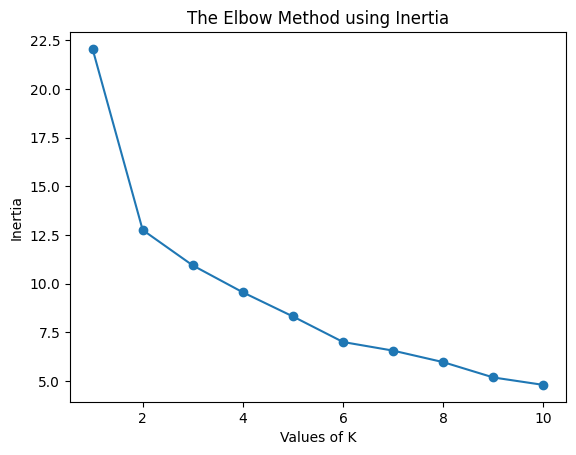

In [8]:
# Plot the inertias to find the Elbow
plt.plot(range(1, 11), inertias, marker="o")
plt.xlabel("Values of K")
plt.ylabel("Inertia")
plt.title("The Elbow Method using Inertia")
plt.show()

In [9]:
model = KMeans(n_clusters=2, random_state = 5)

model = model.fit(df_norm)

In [10]:
model.labels_

model.inertia_

model.cluster_centers_

# Add the labels to the dataset
df["label"] = model.labels_
df.head()

,MSA Code,MSA Name,FIPS State Code,HPI Volatility,Most Recent HPI,Population,Unemployment Rate,label
0,10180,"Abilene, TX",48,6.376873,336.73,184278,3.5,0
1,10380,"Aguadilla, PR",72,6.500000,250.00,250969,7.6,0
2,10420,"Akron, OH",39,4.253307,257.62,702209,4.4,0
3,10500,"Albany, GA",13,4.271005,241.76,145451,4.2,0
4,10540,"Albany, OR",41,5.997320,420.17,132474,4.6,1


<Axes: xlabel='Population', ylabel='Most Recent HPI'>

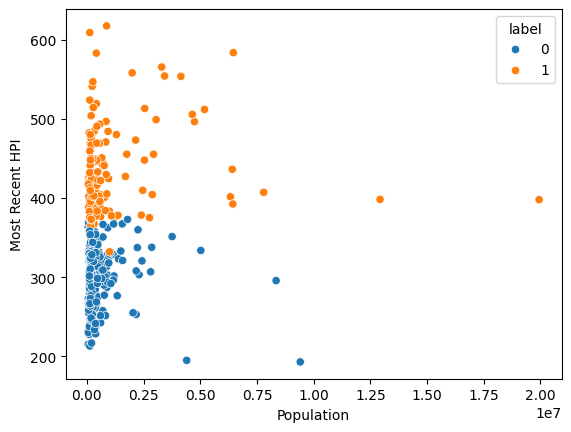

In [11]:
sns.scatterplot(data=df, x="Population", y="Most Recent HPI", hue = "label")

In [12]:
# Silhoutte Score

silhouette_score(df_norm, model.labels_)

np.float64(0.4313960090641558)